# Laptop Price Prediction (Flipkart Dataset)<br>
### Meta Data<br>
1.**product_name** =     This Column gives an overview discription of the product. _(Important Column)_ <br>
2.**selling_price** =    This column tells the selling price of the laptop.  _(Important Column)_ <br>
3.**actual_price** =     This column gives the actual price of the laptop.<br>
4.**average_rating** =   Average rating(0.0-5.0) (stars) of the product on the site.<br>
5.**rating_and_rivew** = Rating & review of the product on the site.<br>
6.**ram** =              Ram memory and its type.  _(Important Column)_<br>
7.**SSD** =              Info about the ROM memory of the laptop.  _(Important Column)_<br>
8.**processor** =        Info about the processor of the laptop.  _(Important Column)_<br>
9.**operating_system** = OS of the laptop.  _(Important Column)_<br>
10.**exchange_offer** =  Offers on products details<br>
11.**display_size** =    Has info related to size of screen and Touchscreen Compatibility of the laptop.  _(Important Column)_<br>

In [1]:
## Importing the Required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
import scipy.stats as stats
import re

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import pickle

In [2]:
df = pd.read_csv('./modified_laptops.csv')

In [3]:
df.head()

,Unnamed: 0,product_name,selling_price,actual_price,average_rating,rating_and_rivew,ram,SSD,processor,operating_system,exchange_offer,display_size
0,0,DELL XPS 13 Core i7 8th Gen - (16 GB/512 GB SS...,"₹1,22,490","₹1,39,104",1.7,3 Ratings & 0 Reviews,16 GB DDR3 RAM,512 GB SSD,Intel Core i7 Processor (8th Gen),64 bit Windows 10 Operating System,"Upto ₹18,100 Off on Exchange",33.78 cm (13.3 inch) Display
1,1,ASUS ZenBook S Core i7 8th Gen - (16 GB/512 GB...,"₹99,990","₹1,22,990",4.3,30 Ratings & 7 Reviews,16 GB DDR3 RAM,512 GB SSD,Intel Core i7 Processor (8th Gen),64 bit Windows 10 Operating System,"Upto ₹18,100 Off on Exchange",33.78 cm (13.3 inch) Display
2,2,Lenovo ThinkPad X1 Core i7 10th Gen - (16 GB/5...,"₹2,14,999","₹2,29,599",0.0,0,16 GB DDR3 RAM,512 GB SSD,Intel Core i7 Processor (10th Gen),64 bit Windows 10 Operating System,Bank Offer,35.56 cm (14 inch) Touchscreen Display
3,3,MSI GS Core i7 8th Gen - (16 GB/512 GB SSD/Win...,"₹1,49,990","₹1,69,990",4.1,10 Ratings & 3 Reviews,16 GB DDR4 RAM,512 GB SSD for Reduced Boot Up Time and in Gam...,Intel Core i7 Processor (8th Gen),Pre-installed Genuine Windows 10 Operating Sys...,"Upto ₹18,100 Off on Exchange",39.62 cm (15.6 inch) Display
4,4,MSI Stealth Core i7 8th Gen - (16 GB/512 GB SS...,"₹1,84,790","₹1,89,990",4.8,5 Ratings & 1 Reviews,16 GB DDR4 RAM,512 GB SSD,Intel Core i7 Processor (8th Gen),64 bit Windows 10 Operating System,"Upto ₹18,100 Off on Exchange",39.62 cm (15.6 inch) Display


In [4]:
df.shape

(946, 12)

In [5]:
df.drop('Unnamed: 0',axis=1,inplace=True)

## checking duplicated rows

In [6]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True,inplace=True)

In [7]:
df.shape

(946, 11)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946 entries, 0 to 945
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   product_name      946 non-null    object 
 1   selling_price     946 non-null    object 
 2   actual_price      946 non-null    object 
 3   average_rating    946 non-null    float64
 4   rating_and_rivew  946 non-null    object 
 5   ram               946 non-null    object 
 6   SSD               946 non-null    object 
 7   processor         946 non-null    object 
 8   operating_system  946 non-null    object 
 9   exchange_offer    946 non-null    object 
 10  display_size      946 non-null    object 
dtypes: float64(1), object(10)
memory usage: 81.4+ KB


In [9]:
df.isna().sum()

product_name        0
selling_price       0
actual_price        0
average_rating      0
rating_and_rivew    0
ram                 0
SSD                 0
processor           0
operating_system    0
exchange_offer      0
display_size        0
dtype: int64

### A quick univariate analysis on the target variable (selling_price)

In [10]:
df['selling_price']= df['selling_price'].str.replace('₹','').str.replace(',','').astype('int32')

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='selling_price', ylabel='Density'>

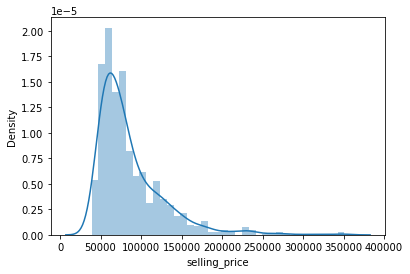

In [11]:
## Price analysis
## Right skewed
sns.distplot(df['selling_price'])

### Working on product name column

We will make three important columns using this column:<br>
1.brand<br>
2.Gpu_brand<br>
3.Gpu_gb<br>

In [12]:
## This function extracts various strings using the regular expression module(re)
def extractor(pattern,col,null=''):
    lst=[]
    for i in df[col]:
        box=re.findall(pattern,i)
        if len(box)!=0:
            lst.append(box[0])
        else:
            lst.append(null)
    return lst

In [13]:
## Taking the brand name out just by splitting the product name column on whitespace
df['product_name'] = df['product_name'].str.lower()
df= df.sort_values(by='product_name').reset_index(drop=True)
df['brand'] = df['product_name'].str.split(' ',n=1,expand=True).iloc[:,0]

In [14]:
## creating a plotting function:
def eda(col):
    if df[col].value_counts().shape[0] <30:
        fig, (ax1,ax2) = plt.subplots(ncols=2,nrows=2,figsize = (10,8))
        ## Value count Chart
        df[col].value_counts().plot(kind='bar',ax=ax1[0])
        ax1[0].set_title(f'value counts for {col}')
        
        ## Bar chart
        sns.barplot(x= df[col],y=df['selling_price'],ax=ax1[1])
        ax1[1].tick_params(axis='x', labelrotation = 90)
        ax1[1].set_title(f'bar chart {col} with selling_price')
        
        ## Box PLot
        sns.boxplot(df[col],df['selling_price'],ax=ax2[0])
        ax2[0].tick_params(axis='x', labelrotation = 90)
        ax2[0].set_title(f'box plot {col} with selling_price')
        
        ## plotting a reg plot if  column is numerical 
        if df[col].dtype != 'object':
            sns.regplot(df[col],df['selling_price'],ax2[1])
            ax2[1].tick_params(axis='x', labelrotation = 90)
            ax2[1].set_title(f'scatter plot chart {col} with selling_price')
        else:
            fig.delaxes(ax2[1])
        plt.tight_layout()
    else:
        ## plotting a single reg plot for  continuos numerical column
        sns.regplot(df[col],df['selling_price'])
        
        ## To plot the scatter plot for numerical columns on the fourth axis 
    if df[col].dtype != 'object':
        fig2, (ax3,ax4) = plt.subplots(ncols=2,nrows=1,figsize = (10,5))
        sns.distplot(df[col],ax=ax3)
        ax3.set_title(f'scatter plot chart {col} with selling_price')
        stats.probplot(df[col],plot=ax4)
        
        ## printing the correlation
        print('correlation with selling price: ',df.corr()['selling_price'][col])

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


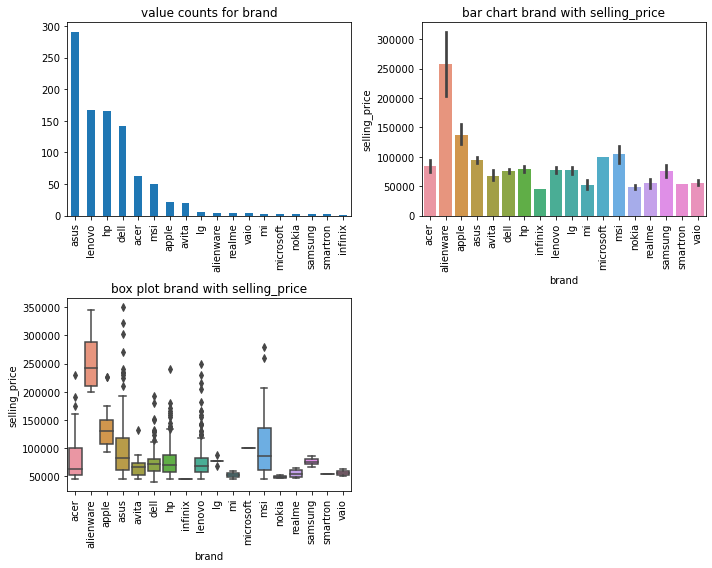

In [15]:
## EDA on brand column
eda('brand')

## Ram and Ram_type<br>
We will extract two columns from the ram column:<br>
1.ram_gb<br>
2.ram_type<br>

In [16]:
## ram_gb
test = df['ram'].str.split('\s',n=4,expand=True)
df['ram_gb'] = test.iloc[:,0]   #Extracted the ram_gb column
df['ram_type'] =  test.iloc[:,2] #Extracted the ram_type column
df.drop('ram',axis=1,inplace=True)
df['ram_gb']=df['ram_gb'].astype('int32')

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


correlation with selling price:  0.6407555051010153


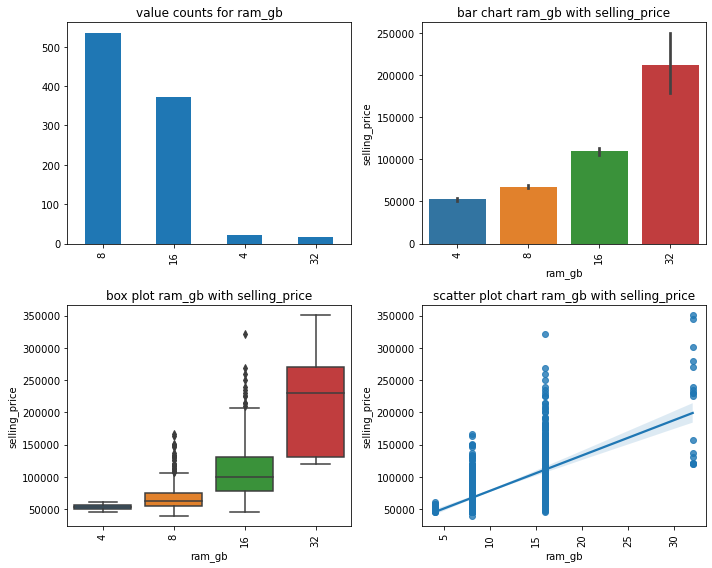

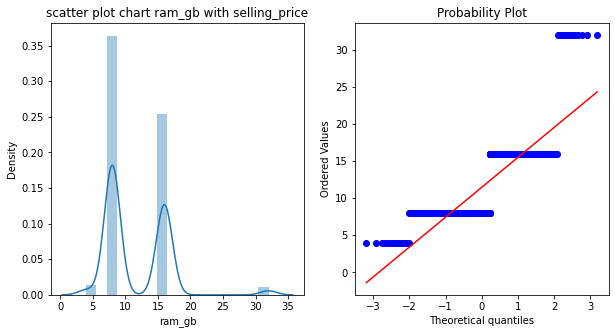

In [17]:
## EDA on ram_gb
eda('ram_gb');

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


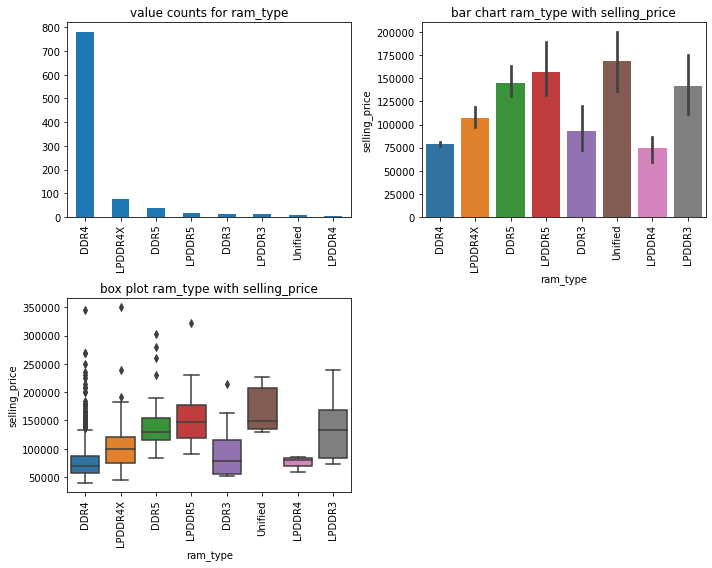

In [18]:
## EDA on Ram type:
eda('ram_type')

### There is significant variations in prices for ram type, this is important column

###  SSD<br>
Creating three columns from the SSD column:<br>
1.ssd_gb<br>
2.hdd_gb<br>
3.emmc_gb

In [19]:
df['SSD']=df['SSD'].str.lower()
df['SSD']=df['SSD'].str.replace('for reduced boot up time and in game loading','')

In [20]:
index = df[df['SSD']=='m.2 slot for ssd upgrade'].index
df.loc[index,'SSD'] = '1 tb hdd' ## replacing 'm.2 slot for ssd upgrade' with '1 tb hdd' in SSD column

In [21]:
df['SSD'].value_counts()

512 gb ssd               530
1 tb ssd                 174
1 tb hdd|256 gb ssd       95
256 gb ssd                62
1 tb hdd                  57
128 gb ssd                 6
2 tb ssd                   4
512 gb hdd|512 gb ssd      4
1 tb hdd|512 gb ssd        3
1 tb hdd|128 gb ssd        3
128 gb ssd                 2
2 tb hdd                   2
128 gb emmc storage        1
1 tb hdd|1 tb ssd          1
64 gb emmc storage         1
512 gb ssd                 1
Name: SSD, dtype: int64

In [22]:
test1=df['SSD'].str.split('|',n=1, expand=True).iloc[:,0]
df['ssd_gb']=df['SSD'].str.split('|',n=1, expand=True).iloc[:,1].apply(lambda x: 0 if x is None else x.split(' ')[0]).astype('int32')

In [23]:
test1.value_counts()

512 gb ssd             530
1 tb ssd               174
1 tb hdd               159
256 gb ssd              62
128 gb ssd               6
2 tb ssd                 4
512 gb hdd               4
128 gb ssd               2
2 tb hdd                 2
128 gb emmc storage      1
64 gb emmc storage       1
512 gb ssd               1
Name: 0, dtype: int64

In [24]:
## creating hdd_gb column
df['hdd_gb'] =test1.apply(lambda x: x.split(' ')[0] if 'hdd' in x else 0).astype('int32')
df['hdd_gb']= df['hdd_gb'].apply(lambda x: 1024*x if (x==1 or x==2) else x )

In [25]:
## creating emmc_gb column
df['emmc_gb'] = test1.apply(lambda x: x.split(' ')[0] if 'emmc' in x else 0).astype('int32')

In [26]:
## creating ssd_gb column
df['ssd_gb'] = test1.apply(lambda x: x.split(' ')[0] if 'ssd' in x else 0).astype('int32') + df['ssd_gb']
df['ssd_gb']=df['ssd_gb'].apply(lambda x: 1024*x if (x==1 or x==2) else x )

In [27]:
df.drop('SSD',axis=1,inplace=True)

Doing EDA on these three columns

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


correlation with selling price:  0.6053344383884517


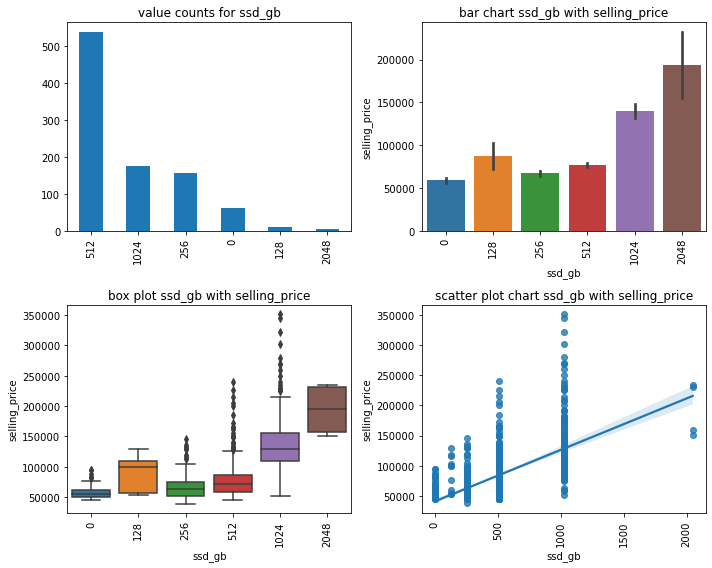

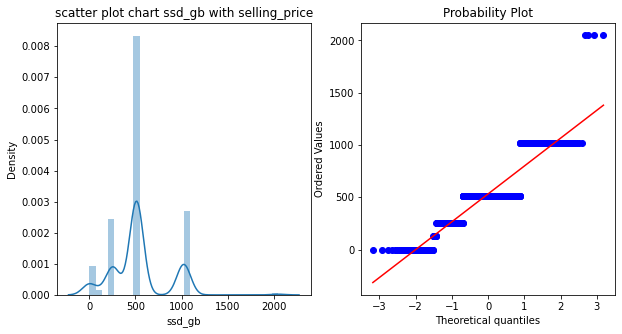

In [28]:
## EDA ssd
eda('ssd_gb')

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


correlation with selling price:  -0.2230512525179289


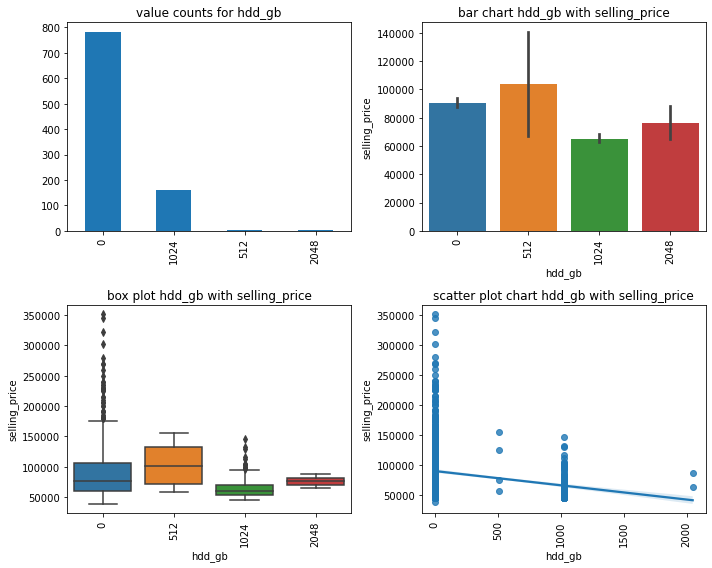

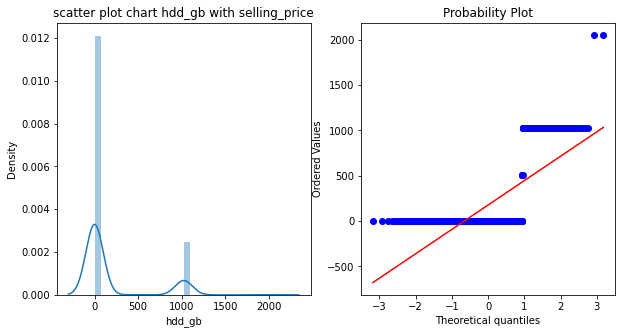

In [29]:
## EDA hdd
eda('hdd_gb')

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


correlation with selling price:  -0.039313237725944375


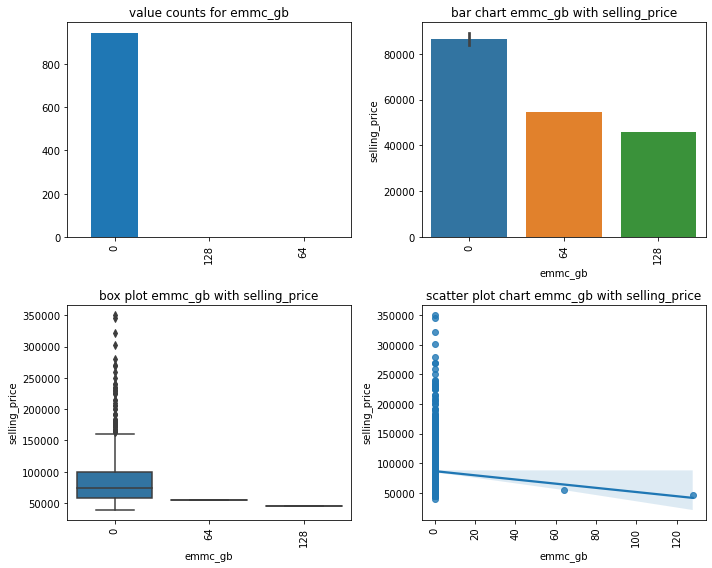

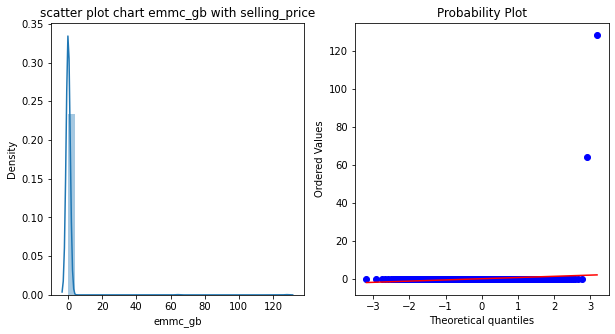

In [30]:
## EDA emmc_gb
eda('emmc_gb')

### Average rating

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


correlation with selling price:  -0.2927055798384008


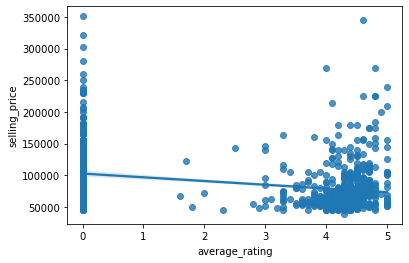

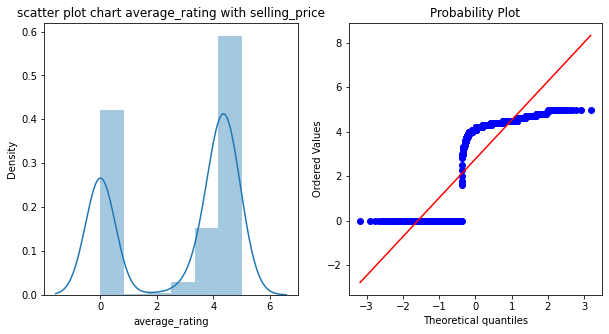

In [31]:
eda('average_rating')

In [32]:
## rating_and_rivew
df['rating_and_rivew'].value_counts()

0                           333
3 Ratings & 0 Reviews        18
4 Ratings & 0 Reviews        17
3 Ratings & 1 Reviews        11
4 Ratings & 1 Reviews         8
                           ... 
418 Ratings & 67 Reviews      1
10 Ratings & 2 Reviews        1
50 Ratings & 8 Reviews        1
13 Ratings & 0 Reviews        1
89 Ratings & 15 Reviews       1
Name: rating_and_rivew, Length: 439, dtype: int64

In [33]:
df['ratings'] = df['rating_and_rivew'].str.split('&',n=1,expand=True).iloc[:,0].str.split(' ',n=1,expand=True).iloc[:,0].str.replace(',','').astype('int32')

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


correlation with selling price:  -0.14486430129655187


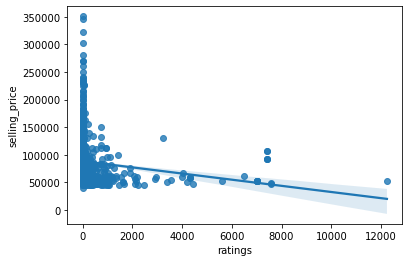

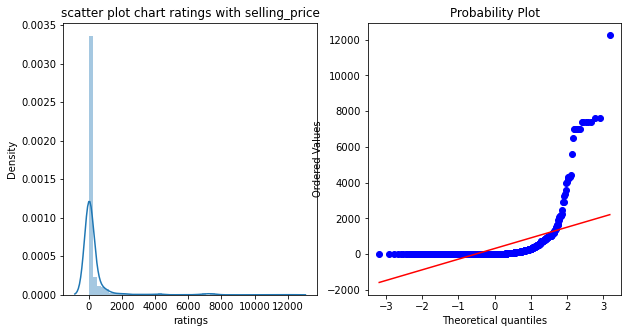

In [34]:
eda('ratings')

## Processor<br>
Creating two columns:<br>
1.processor_name<br>
2.processor_model<br>

In [35]:
df['processor']=df['processor'].str.lower()
df['processor'].value_counts().sort_index()

amd ryzen 3 hexa core processor (4th gen)                                                                      1
amd ryzen 5 dual core processor                                                                                1
amd ryzen 5 dual core processor (5th gen)                                                                      1
amd ryzen 5 hexa core processor                                                                               91
amd ryzen 5 hexa core processor (4th gen)                                                                      1
amd ryzen 5 hexa core processor (5th gen)                                                                      3
amd ryzen 5 octa core processor (11th gen)                                                                     1
amd ryzen 5 quad core processor                                                                               19
amd ryzen 5 quad core processor (3rd gen)                                                       

In [36]:
df['processor_name']=df['processor'].str.split(' ',n=1,expand=True).iloc[:,0].str.replace('powered','intel').str.replace('asus','amd')
test1 = df['processor'].str.split(' ',n=1,expand=True).iloc[:,0]

In [37]:
amd=extractor(r'ryzen\s\d','processor')
intel=extractor(r'i\d','processor')
apple =extractor(r'm\d','processor')
pentium =extractor(r'pentium quad','processor')

In [38]:
df['amd'] = amd
df['intel'] = intel
df['apple'] = apple
df['pentium'] = pentium

In [39]:
df['processor_model'] = df['amd']+df['intel']+df['apple']+df['pentium']
df.drop(['amd','intel','apple','pentium'],inplace=True,axis=1)

In [40]:
df.head()

,product_name,selling_price,actual_price,average_rating,rating_and_rivew,processor,operating_system,exchange_offer,display_size,brand,ram_gb,ram_type,ssd_gb,hdd_gb,emmc_gb,ratings,processor_name,processor_model
0,acer aspire 3 core i5 10th gen - (8 gb/1 tb hd...,49745,"₹56,491",3.3,33 Ratings & 6 Reviews,intel core i5 processor (10th gen),64 bit Windows 10 Operating System,"Upto ₹18,100 Off on Exchange",39.62 cm (15.6 inch) Display,acer,8,DDR4,0,1024,0,33,intel,i5
1,acer aspire 3 core i5 11th gen - (8 gb/1 tb hd...,48999,"₹57,999",0.0,0,intel core i5 processor (11th gen),64 bit Windows 11 Operating System,Bank Offer,39.62 cm (15.6 Inch) Display,acer,8,DDR4,0,1024,0,0,intel,i5
2,acer aspire 3 core i5 11th gen - (8 gb/1 tb hd...,49599,"₹57,999",0.0,0,intel core i5 processor (11th gen),64 bit Windows 11 Operating System,Bank Offer,39.62 cm (15.6 Inch) Display,acer,8,DDR4,0,1024,0,0,intel,i5
3,acer aspire 3 core i5 11th gen - (8 gb/512 gb ...,49990,"₹59,990",0.0,0,intel core i5 processor (11th gen),64 bit Windows 11 Operating System,Bank Offer,39.62 cm (15.6 Inch) Display,acer,8,DDR4,512,0,0,0,intel,i5
4,acer aspire 3 ryzen 5 quad core 3500u - (8 gb/...,45541,"₹57,999",4.4,336 Ratings & 39 Reviews,amd ryzen 5 quad core processor,64 bit Windows 10 Operating System,"Upto ₹18,100 Off on Exchange",39.62 cm (15.6 inch) Display,acer,8,DDR4,512,0,0,336,amd,ryzen 5


### EDA on 'processor_model' and 'processor_name'

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


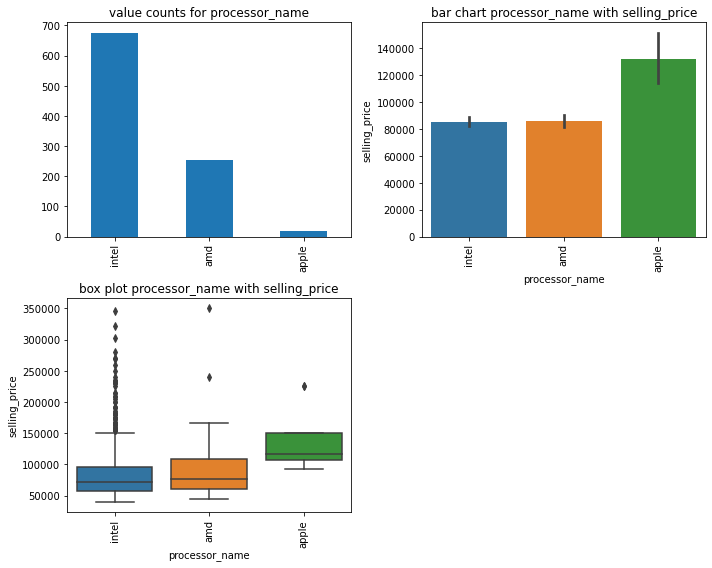

In [41]:
## processor_name
eda('processor_name')

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


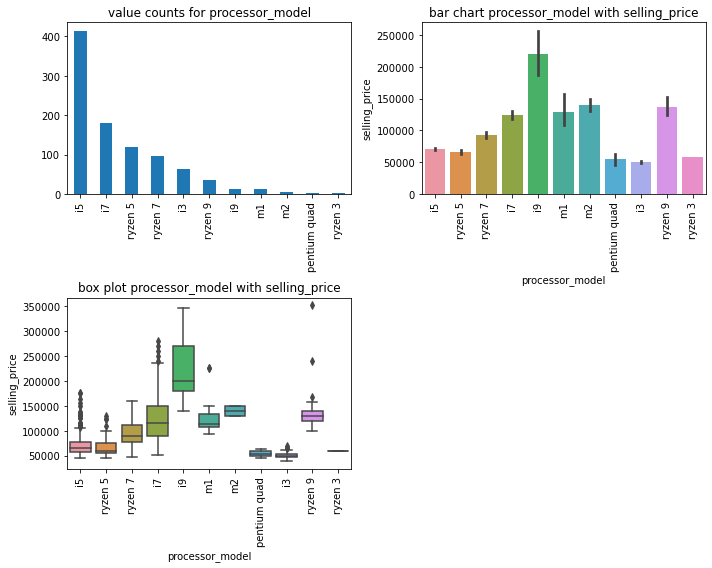

In [42]:
## processor_model
eda('processor_model')

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946 entries, 0 to 945
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   product_name      946 non-null    object 
 1   selling_price     946 non-null    int32  
 2   actual_price      946 non-null    object 
 3   average_rating    946 non-null    float64
 4   rating_and_rivew  946 non-null    object 
 5   processor         946 non-null    object 
 6   operating_system  946 non-null    object 
 7   exchange_offer    946 non-null    object 
 8   display_size      946 non-null    object 
 9   brand             946 non-null    object 
 10  ram_gb            946 non-null    int32  
 11  ram_type          946 non-null    object 
 12  ssd_gb            946 non-null    int64  
 13  hdd_gb            946 non-null    int64  
 14  emmc_gb           946 non-null    int32  
 15  ratings           946 non-null    int32  
 16  processor_name    946 non-null    object 
 1

## GPU <br> 
Note there is no actual gpu column in dataset, but the info for it is implicitly in the product name column: With a thorough analysis it was seen that when ever there were 'graphics' mentioned in product columns those laptops had nvidia graphics in them, while the rest have integrated graphics of the respective processors.

In [44]:
## Extracting GPUs from
df['processor'] = df['processor'].str.lower()
## extracting the string 'graph' from product names
df['nvd']=extractor('grap\w+','product_name') 
df['intel'] = extractor(r'intel','processor_name')
df['amd'] =extractor(r'amd','processor_name')
df['m1'] = extractor(r'apple','processor_name')
df['GPU'] = df['nvd'] + ' ' + df['intel'] + ' ' + df['amd']+ ' '+ df['m1'] 
lst = []
for i in df['GPU']:
    if 'graph' in  i:
        lst.append('nvidia')
    elif 'intel' in i:
        lst.append('intel')
    elif 'apple' in i:
        lst.append('apple')
    else:
        lst.append('amd')
df['gpu'] = lst

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


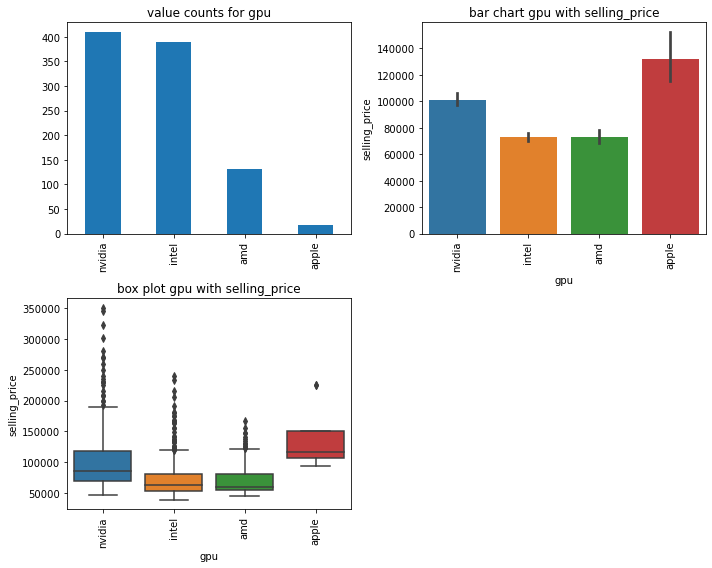

In [45]:
## EDA gpu
eda('gpu')

### GPU gb

In [46]:
df['GPU_gb'] = extractor('\d\sgb\sgrap\w+','product_name',null=np.nan) 
df['GPU_gb'] = df['GPU_gb'].str.split(' ',n=1,expand=True).iloc[:,0].fillna(0)
df['GPU_gb'] = df['GPU_gb'].astype('int32')

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


correlation with selling price:  0.484828386180042


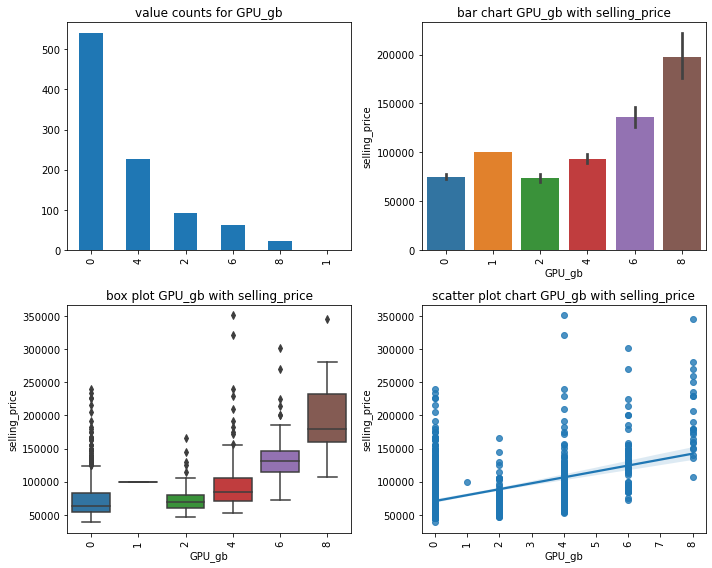

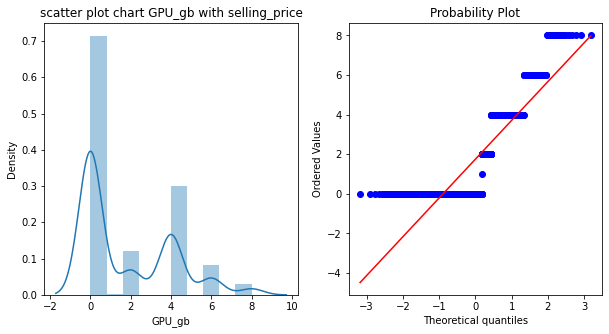

In [47]:
## EDA gpu gb
eda('GPU_gb')

## Operating system <br>
Creating a column named OS

In [48]:
df['operating_system'].value_counts()

64 bit Windows 10 Operating System                                                                                         519
64 bit Windows 11 Operating System                                                                                         266
Windows 10 Operating System                                                                                                 63
Windows 11 Operating System                                                                                                 56
Mac OS Operating System                                                                                                     21
Pre-installed Genuine Windows 10 Operating System (Includes Built-in Security, Free Automated Updates, Latest Features)     11
DOS Operating System                                                                                                         6
Linux/Ubuntu Operating System                                                                                  

In [49]:
df['windows'] = extractor('Win\w+.','operating_system')
df['mac']= extractor(r'Mac\sOS','operating_system')
df['dos']= extractor(r'DOS','operating_system')
df['linux/unix'] = extractor(r'\w+/\w+','operating_system')
df['chrome'] = extractor(r'Chrome','operating_system')
df['OS'] = df['windows']+df['mac']+df['dos']+df['linux/unix']+df['chrome']
df.drop(['windows', 'mac', 'dos', 'linux/unix', 'chrome','operating_system'],inplace=True,axis=1)
## As there are only 7 DOS, 1 Linux/unix, 1 Chrome OS we club them toghether in column 'others' 

test = df['OS'].value_counts()
other=test[test<8].index
df['OS']=df['OS'].replace(other,'others')

## EDA on OS

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


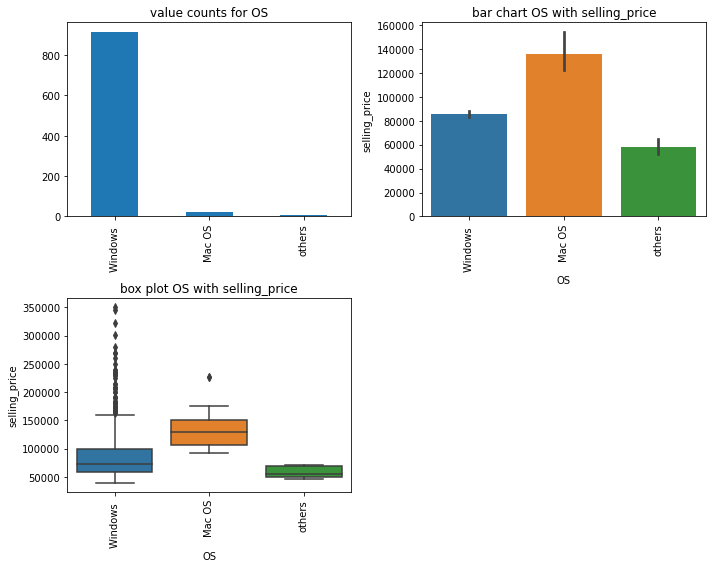

In [50]:
## OS
eda('OS')

## Display Size<br>
we create two new columns:<br>
1. display_size (inches) <br>
2. Touchscreen (boolean column)<br>

In [51]:
df['display_size'] = df['display_size'].str.lower()

In [52]:
## Touchscreen Columns
df['touchscreen'] = df['display_size'].apply(lambda x: 'yes' if 'touchscreen' in x else 'no')

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


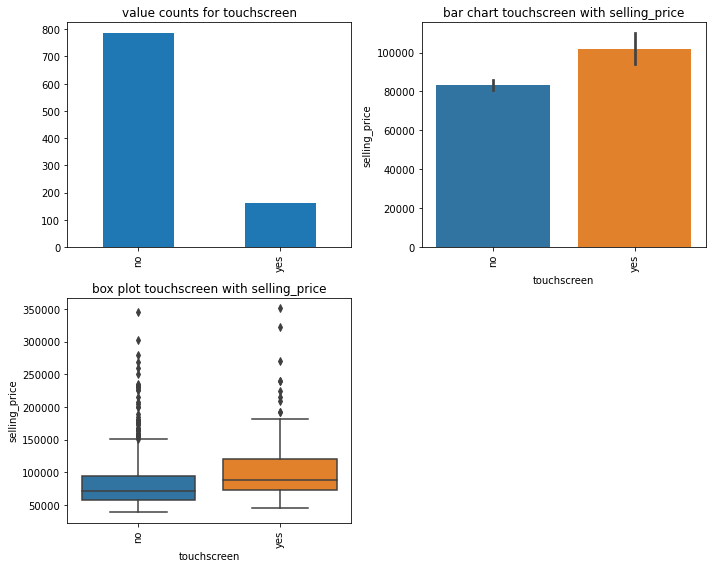

In [53]:
eda('touchscreen')

In [54]:
## extracting display size
df['display_size'] = extractor(r'\d*\.?\d+\sinch','display_size') # extracts display of type '\d\d.\d inch')
df['display_size']=df['display_size'].str.split(' ',n=1,expand=True).iloc[:,0]
## replacing '' with the most frequent value (mode)
df.loc[np.where(df['display_size']=='')[0][0],'display_size'] = df['display_size'].mode()[0]
df['display_size']=df['display_size'].astype('float32')

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


correlation with selling price:  -0.019944753134559387


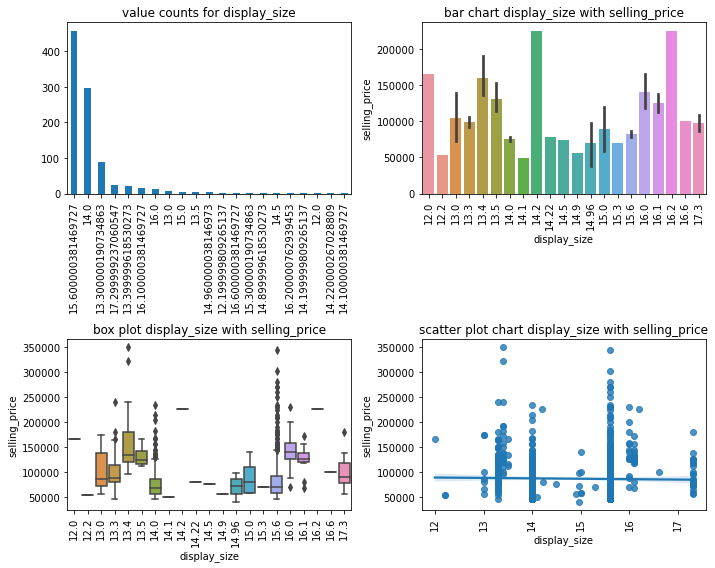

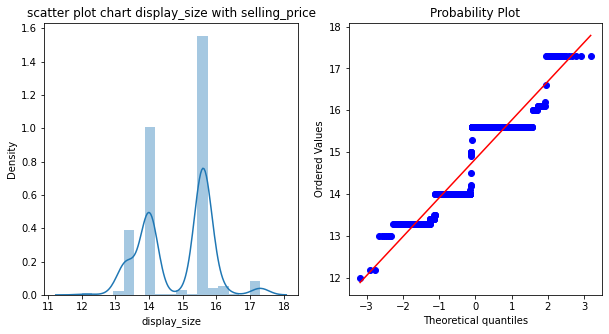

In [55]:
## EDA on display size
eda('display_size')

Not much variation of display size with price also the correaltion is very low

## Checking exchange offer

In [56]:
df['exchange_offer'].value_counts()  ## not of much use we will drop it

Bank Offer                        470
Upto ₹18,100 Off on Exchange      405
0                                  46
Upto ₹23,100 Off on Exchange       17
Lowest price since launch           2
Upto ₹21,100 Off on Exchange        1
No Cost EMI from ₹9,750/month       1
No Cost EMI from ₹7,041/month       1
No Cost EMI from ₹8,750/month       1
No Cost EMI from ₹10,666/month      1
Lowest Price in 15 days             1
Name: exchange_offer, dtype: int64

In [57]:
df.drop('exchange_offer',axis=1,inplace=True)

### The final columns chosen for modelling:

In [58]:
final_columns = ['selling_price','display_size','brand','ram_gb','ram_type','ssd_gb','hdd_gb'
                 ,'processor_name','processor_model', 'OS', 'touchscreen','gpu','GPU_gb']

In [59]:
df_new= df[final_columns]

In [60]:
df_new.sample(10)

,selling_price,display_size,brand,ram_gb,ram_type,ssd_gb,hdd_gb,processor_name,processor_model,OS,touchscreen,gpu,GPU_gb
619,67690,15.6,hp,8,DDR4,512,0,intel,i5,Windows,no,nvidia,4
337,67990,14.0,asus,8,DDR4,512,0,amd,ryzen 7,Windows,no,amd,0
156,156990,13.4,asus,32,LPDDR4X,1024,0,amd,ryzen 9,Windows,yes,nvidia,4
746,62990,14.0,lenovo,16,DDR4,512,0,intel,i5,Windows,no,intel,0
10,50999,15.6,acer,8,DDR4,0,1024,intel,i5,Windows,no,intel,0
737,47490,15.6,lenovo,8,DDR4,512,0,amd,ryzen 5,Windows,no,amd,0
500,64290,15.6,dell,8,DDR4,512,0,intel,i5,Windows,no,nvidia,2
514,51990,15.6,dell,8,DDR4,256,1024,amd,ryzen 5,Windows,no,amd,0
255,49990,14.0,asus,8,DDR4,256,1024,intel,i5,Windows,no,intel,0
412,58990,14.0,dell,8,DDR4,0,1024,intel,i5,Windows,no,intel,0


<AxesSubplot:>

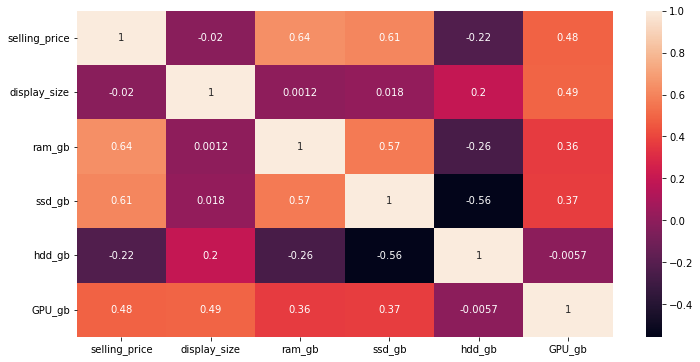

In [61]:
plt.figure(figsize=(12,6))
sns.heatmap(df_new.corr(),annot=True)

### Feature Engineering

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


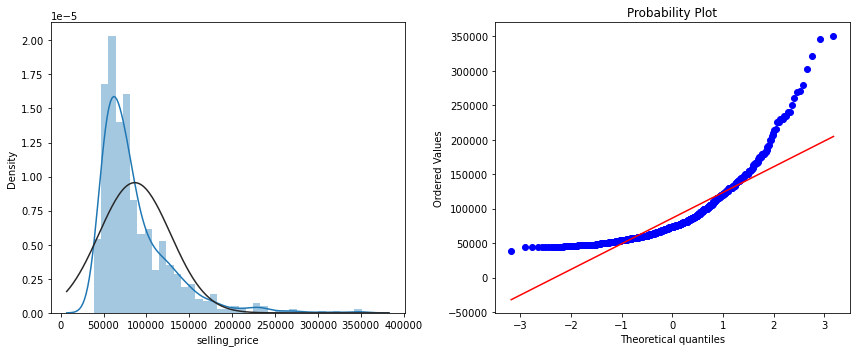

In [62]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(12,5))
sns.distplot(df_new['selling_price'],fit=norm,ax=ax1)
stats.probplot(df_new['selling_price'], plot=ax2)## Right Skwed
plt.tight_layout()
plt.show()

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


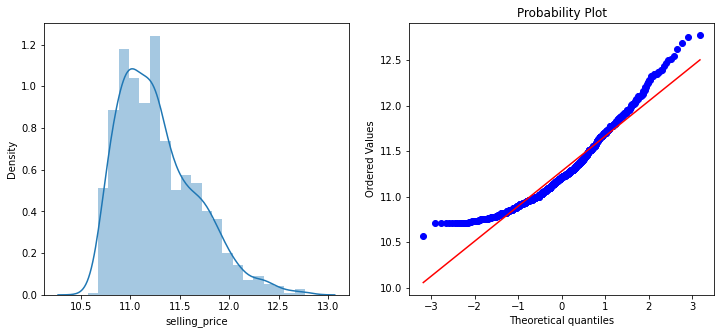

In [63]:
## applying log transformation on it
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(12,5))
sns.distplot(np.log(df_new['selling_price']),ax=ax1)
stats.probplot(np.log(df_new['selling_price']), plot=ax2)## Right Skwed
plt.show()

In [64]:
X = df_new.drop('selling_price',axis=1)
y = np.log(df_new['selling_price'])

In [65]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.18,random_state=32)

In [67]:
X_train.head(3)

,display_size,brand,ram_gb,ram_type,ssd_gb,hdd_gb,processor_name,processor_model,OS,touchscreen,gpu,GPU_gb
635,15.6,hp,16,DDR4,1024,0,intel,i7,Windows,no,intel,0
595,16.1,hp,16,DDR4,1024,0,intel,i7,Windows,no,nvidia,8
671,14.0,hp,16,DDR4,512,0,intel,i7,Windows,yes,intel,0


In [68]:
## This function will give us the index representation of numerical and categorical columns which will be used in column transformer
object_indices = []
decimal_idx = []
for i in range(X_train.shape[1]):
    if X_train.iloc[:,i].dtype== 'object':
        object_indices.append(i)
    else:
        decimal_idx.append(i)
print(object_indices)
print(decimal_idx)

[1, 3, 6, 7, 8, 9, 10]
[0, 2, 4, 5, 11]


In [69]:
## we will one-hot encode [2, 4, 9, 10, 11, 12] column and scaling the numerical columns
transformer = ColumnTransformer(transformers=[
    ('ohe',OneHotEncoder(sparse=False, drop='first'),object_indices),
    ('scale',StandardScaler(),decimal_idx) ## Scaling the numerical columns 
],remainder='passthrough')

In [70]:
X_train_tf = transformer.fit_transform(X_train.values)
X_test_tf = transformer.transform(X_test.values)

In [71]:
X_train_tf.shape

(775, 47)

# Model Building<br>
##  Linear Regression 

In [72]:
## Linear Regression 
pipe1 = LinearRegression()
pipe = Pipeline([
    ('step1',pipe1)
]
)

pipe.fit(X_train_tf,y_train)
y_pred = pipe.predict(X_test_tf)
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.8012299019227359
0.12409606929505088
0.027420745700865


## Lasso

In [73]:
## Lasso

pipe1 =Lasso(alpha=0.0001)
pipe = Pipeline([
    ('step1',pipe1)
]
)

pipe.fit(X_train_tf,y_train)
y_pred = pipe.predict(X_test_tf)
y_pred_tr = pipe.predict(X_train_tf)
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_train,y_pred_tr))
print(mean_absolute_error(y_train,y_pred_tr))
print(mean_squared_error(y_train,y_pred_tr))

0.8021190718788958
0.12297826639730788
0.02729808286833356
0.8208160386704684
0.12319159416434994
0.028390584632994542


## Ridge

In [74]:
## Ridge

pipe1 =Ridge(alpha=0.1)
pipe = Pipeline([
    ('step1',pipe1)
]
)

pipe.fit(X_train_tf,y_train)
y_pred = pipe.predict(X_test_tf)
y_pred_tr = pipe.predict(X_train_tf)
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_train,y_pred_tr))
print(mean_absolute_error(y_train,y_pred_tr))
print(mean_squared_error(y_train,y_pred_tr))

0.8023239800996088
0.12336841567573566
0.02726981535593336
0.8213072040951179
0.12280641191806506
0.0283127625251795


## DecisionTreeRegressor

In [75]:
pipe1 =DecisionTreeRegressor(max_depth=9)
pipe = Pipeline([
    ('step1',pipe1)
]
)

pipe.fit(X_train_tf,y_train)
y_pred = pipe.predict(X_test_tf)
y_pred_tr = pipe.predict(X_train_tf)
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_train,y_pred_tr))
print(mean_absolute_error(y_train,y_pred_tr))
print(mean_squared_error(y_train,y_pred_tr))

0.700821625917299
0.1375863127367127
0.04127227482541734
0.8822353874325576
0.09350537188599976
0.0186590706838936


## RandomForestRegressor

In [76]:
pipe1 =RandomForestRegressor(n_estimators=1000,
                            random_state=3,
                           max_samples=0.5,
                           max_features=0.5,
                           max_depth=12,
                           oob_score=True)
pipe = Pipeline([
    ('step1',pipe1)
]
)

pipe.fit(X_train_tf,y_train)
y_pred = pipe.predict(X_test_tf)
y_pred_tr = pipe.predict(X_train_tf)
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_train,y_pred_tr))
print(mean_absolute_error(y_train,y_pred_tr))
print(mean_squared_error(y_train,y_pred_tr))

0.8091161663503444
0.11833575810339626
0.026332819229574665
0.8949817076283308
0.09240400400861945
0.016639495496514875


## AdaBoostRegressor

In [77]:
##AdaBoostRegressor
ada =AdaBoostRegressor()
ada.fit(X_train_tf,y_train)

AdaBoostRegressor()

In [78]:
y_pred = ada.predict(X_test_tf)
print('r2_score',r2_score(y_test,y_pred))
print('mae',mean_absolute_error(y_test,y_pred))
print('mse',mean_squared_error(y_test,y_pred))

r2_score 0.6506929213924004
mae 0.17932748758124917
mse 0.048187633183578105


## GradientBoostingRegressor

In [79]:
## GradientBoostingRegressor
gbr =GradientBoostingRegressor()
gbr.fit(X_train_tf,y_train)

GradientBoostingRegressor()

In [80]:
y_pred = gbr.predict(X_test_tf)
print('r2_score',r2_score(y_test,y_pred))
print('mae',mean_absolute_error(y_test,y_pred))
print('mse',mean_squared_error(y_test,y_pred))

r2_score 0.7829751238331135
mae 0.1283404343691529
mse 0.029939030053809705


## XGBRegressor

In [98]:
## XGBRegressor
xgr =XGBRegressor(n_estimators=100,max_depth = 8,reg_alpha = 0.00001)
xgr.fit(X_train_tf,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=8, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=1e-05, reg_lambda=1, ...)

In [99]:
y_pred = xgr.predict(X_test_tf)
y_pred_train = xgr.predict(X_train_tf)
print('r2_score',r2_score(y_test,y_pred))
print('mae',mean_absolute_error(y_test,y_pred))
print('mse',mean_squared_error(y_test,y_pred))
print('r2_score_tr',r2_score(y_train,y_pred_train))
print('mae_tr',mean_absolute_error(y_train,y_pred_train))
print('mse_tr',mean_squared_error(y_train,y_pred_train))

r2_score 0.8596259214316377
mae 0.10040448277243319
mse 0.01936489415988563
r2_score_tr 0.9529923470025184
mae_tr 0.047051780010832295
mse_tr 0.007448070356972774


## k-fold Cross validation

In [83]:
from sklearn.model_selection import cross_val_score
print(np.mean(cross_val_score(xgr,X_train_tf,y_train,cv=4,scoring='r2')))

0.776670322864927


## Grid Search CV

In [84]:
from sklearn.model_selection import GridSearchCV
n_estimators = [100,500,1000]
random_state = [4]
max_depth= [12,9,8]   
params = {'n_estimators':n_estimators,
          'random_state':random_state,
         'max_depth':max_depth}
grid = GridSearchCV(xgr, param_grid=params,scoring='r2',cv=3)

In [85]:
grid.fit(X_train_tf,y_train)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    callbacks=None, colsample_bylevel=1,
                                    colsample_bynode=1, colsample_bytree=1,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=0, gpu_id=-1, grow_policy='depthwise',
                                    importance_type=None,
                                    interaction_constraints='',
                                    learning_rate=0.3, max_bin=256,
                                    max_cat_to_onehot=4, max_delta_step=0,
                                    max_depth=8, max_leaves=0,
                                    min_child_weight=1, missing=nan,
                                    monotone_constraints='()', n_estimators=500,
                                    n_jobs=0, num_parallel_tree=1,
                                    predictor='auto', random_state=0,
                                    reg_alpha=0.0005, reg_lambda=1, ...),
             param_grid={'max_depth': [12, 9, 8],
                         'n_estimators': [100, 500, 1000],
                         'random_state': [4]},
             scoring='r2')

In [86]:
grid.best_params_

{'max_depth': 8, 'n_estimators': 100, 'random_state': 4}

## Selecting XGBRegressor as our final algo

In [87]:
## pipe line for XGBREgressor
pipe1 = ColumnTransformer(transformers=[
    ('ohe',OneHotEncoder(sparse=False, drop='first'),object_indices),
    ('scale',StandardScaler(),decimal_idx)
],remainder='passthrough')

pipe2 =XGBRegressor(n_estimators=100,max_depth = 8,reg_alpha = 0.00001)
pipe = Pipeline([
    ('step1',pipe1),
    ('step2',pipe2)   ]
)

In [94]:
## Evaluations
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
y_pred_tr = pipe.predict(X_train)
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_train,y_pred_tr))
print(mean_absolute_error(y_train,y_pred_tr))
print(mean_squared_error(y_train,y_pred_tr))

0.8596259214316377
0.10040448277243319
0.01936489415988563
0.9529923470025184
0.047051780010832295
0.007448070356972774


In [95]:
## test prediction
test = pd.DataFrame({'display_size':13.3,'brand':'apple','ram_gb':8,'ram_type':'DDR4','ssd_gb':256,'hdd_gb':0,'processor_name':'apple','processor_model':'m1','OS':'Mac OS','touchscreen':'no', 'gpu':'apple','GPU_gb':0 },index=[0])

In [90]:
np.exp(pipe.predict(test))

array([99956.69], dtype=float32)

In [91]:
df_new

,selling_price,display_size,brand,ram_gb,ram_type,ssd_gb,hdd_gb,processor_name,processor_model,OS,touchscreen,gpu,GPU_gb
0,49745,15.6,acer,8,DDR4,0,1024,intel,i5,Windows,no,nvidia,2
1,48999,15.6,acer,8,DDR4,0,1024,intel,i5,Windows,no,intel,0
2,49599,15.6,acer,8,DDR4,0,1024,intel,i5,Windows,no,intel,0
3,49990,15.6,acer,8,DDR4,512,0,intel,i5,Windows,no,intel,0
4,45541,15.6,acer,8,DDR4,512,0,amd,ryzen 5,Windows,no,amd,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,52990,12.2,smartron,4,DDR3,128,0,intel,i5,Windows,yes,intel,0
942,50990,15.6,vaio,8,DDR4,512,0,amd,ryzen 5,Windows,no,amd,0
943,52990,15.6,vaio,8,DDR4,512,0,amd,ryzen 7,Windows,no,amd,0
944,57990,15.6,vaio,8,DDR4,512,0,amd,ryzen 7,Windows,no,amd,0


Hence after addding the gpu colummn the r2 score for xgboost regressor increased from 0.8 to 0.84 and we will make it as our final model

### Exporting Model

In [92]:
## Pickling the dataframe and model
pickle.dump(df_new,open('df.pkl','wb'))
pickle.dump(pipe,open('ppipe.pkl','wb'))